In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
root_dataset_path = ""
worst = ['test/SNGS-191/img1/000151.jpg', 'test/SNGS-148/img1/000476.jpg', 'test/SNGS-192/img1/000526.jpg', 'test/SNGS-196/img1/000676.jpg', 'test/SNGS-198/img1/000501.jpg']
best = ['test/SNGS-191/img1/000426.jpg', 'test/SNGS-193/img1/000451.jpg', 'test/SNGS-196/img1/000376.jpg', 'test/SNGS-149/img1/000701.jpg', 'test/SNGS-188/img1/000601.jpg']
out_folder = ""


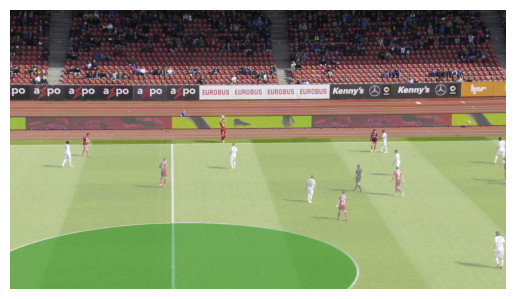

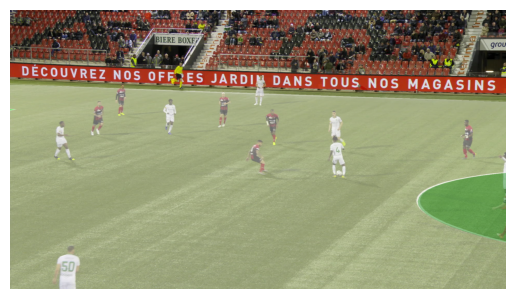

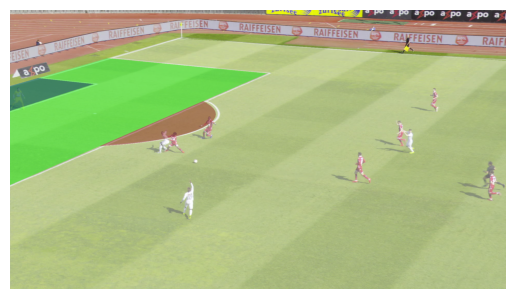

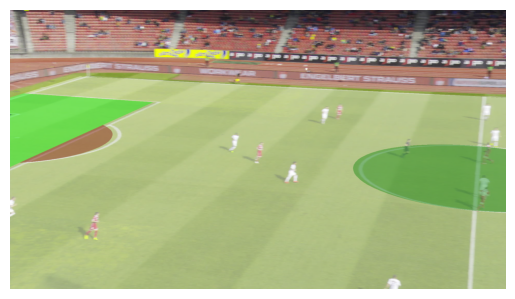

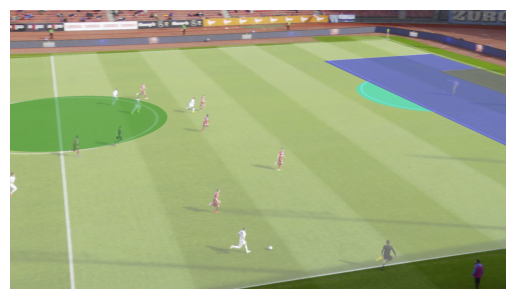

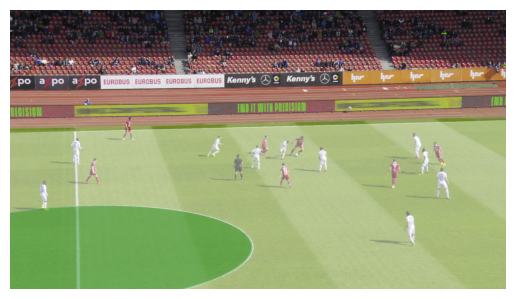

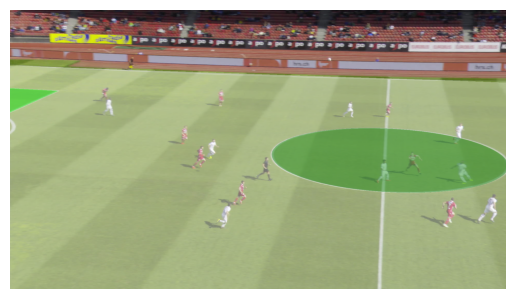

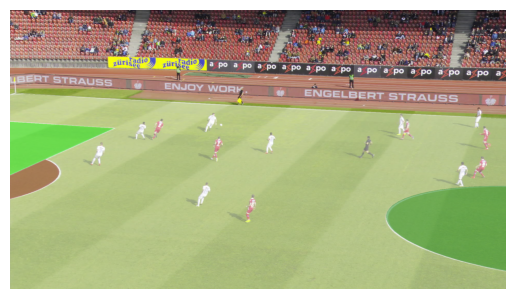

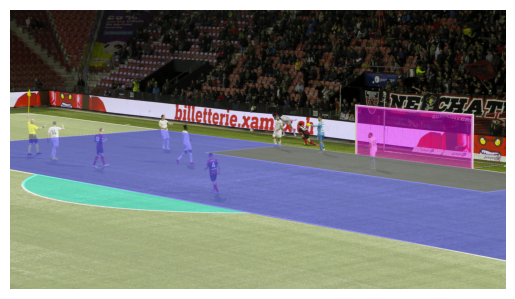

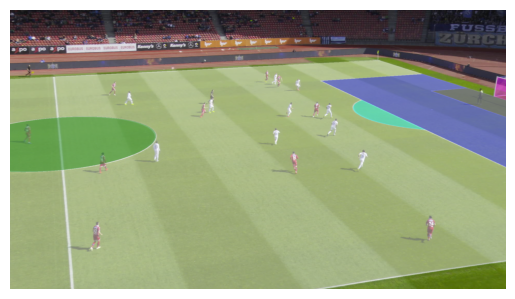

In [29]:


color_for_group = {"Full field": [255, 255, 255], "Big rect. left": [0, 255, 0], "Big rect. right": [0, 0, 255], "Goal left": [255, 255, 0], "Goal right": [255, 0, 255], "Circle right": [0, 255, 255], "Circle left": [128, 0, 0], "Circle central": [0, 128, 0], "Small rect. left": [0, 0, 128], "Small rect. right": [128, 128, 0]}

worst = [os.path.join(root_dataset_path, path) for path in worst]
best = [os.path.join(root_dataset_path, path) for path in best]


skip = [""]

all_img = worst + best
i = 0

for path in all_img:
    if path is None:
        continue
    img = path
    path = path.replace(".jpg", ".npy")

    data = np.load(path, allow_pickle=True) #numpy ndarray
 

    # Extract the dictionary from the 0-d array
    data_dict = data.item()
    alpha = 0.4  # opacity for the  overlay
    overlay = cv2.imread(img)
    height, width, _ = overlay.shape
    overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    # Iterate over the masks in the dictionary
    for group_name, mask in data_dict.items():
        if group_name in skip:
            continue

        
        color = color_for_group[group_name]
        color = np.array(color, dtype=np.uint8)

        mask = mask.astype(bool)
        a = alpha * color
        b = (1 - alpha)
        c = b * overlay[mask]
        
        overlay[mask] = (a + c).astype(np.uint8)
    # plt.figure(figsize=(20, 20))
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()
    # mask_path = out_folder + os.path.basename(img).replace(".jpg", "_mask.png")
    # plt.imsave(mask_path, overlay)
    # break

